Строим распределение ирисов

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = datasets.load_iris() # По 50 цветков каждого типа
X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

(1.5, 4.9)

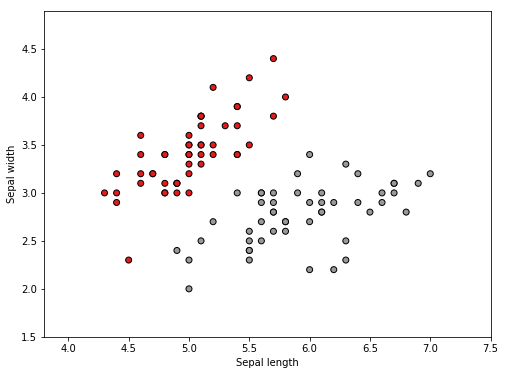

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

In [5]:
# Строим разделяющие линию - зависит от a и b

In [6]:
def giveLine(a,b):
    ## возвращает прямую a*x + b
    ## ! можно заменить на лямбда-функцию
    def Line(x):
        return a*x + b
    return Line

In [7]:
# Ограничить a и b

(1.5, 4.9)

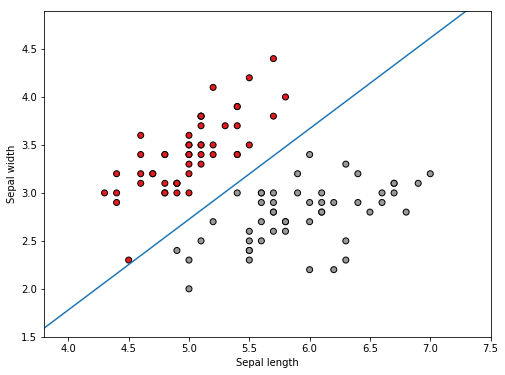

In [8]:
#x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

a,b = .945,-2 # Взято на глаз
f = giveLine(a,b)

X_dots = np.arange(x_min, x_max, .001)
Y_dots = f(X_dots)

plt.plot(X_dots, Y_dots)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [9]:
# TO-DO Построить график линий уровня Accuracy взависимости от a и b 

In [39]:
X_ = np.arange(-1, 1, .1)
Y_ = np.arange(0, 1, .1)

In [38]:
def Z(x,y):
    return 1 if y > 0 else 0

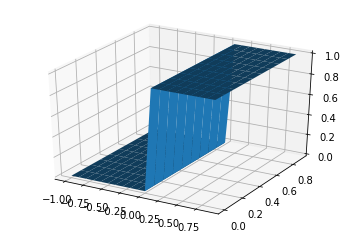

In [75]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')

X_ = np.arange(-1, 1, .1)
Y_ = np.arange(0, 1, .1)
Z_ = np.array(list(map(lambda x: 1 if x > 0 else 0, X_)))

X_, Y_ = np.meshgrid(X_, Y_)
Z_ = np.meshgrid(Z_, Z_)

ax.plot_surface(X_,Y_,Z_[0][:10])

In [74]:
Z_[0][:10].shape

(10, 20)

In [69]:
X_.shape

(10, 20)

In [71]:
Y_.shape

(10, 20)